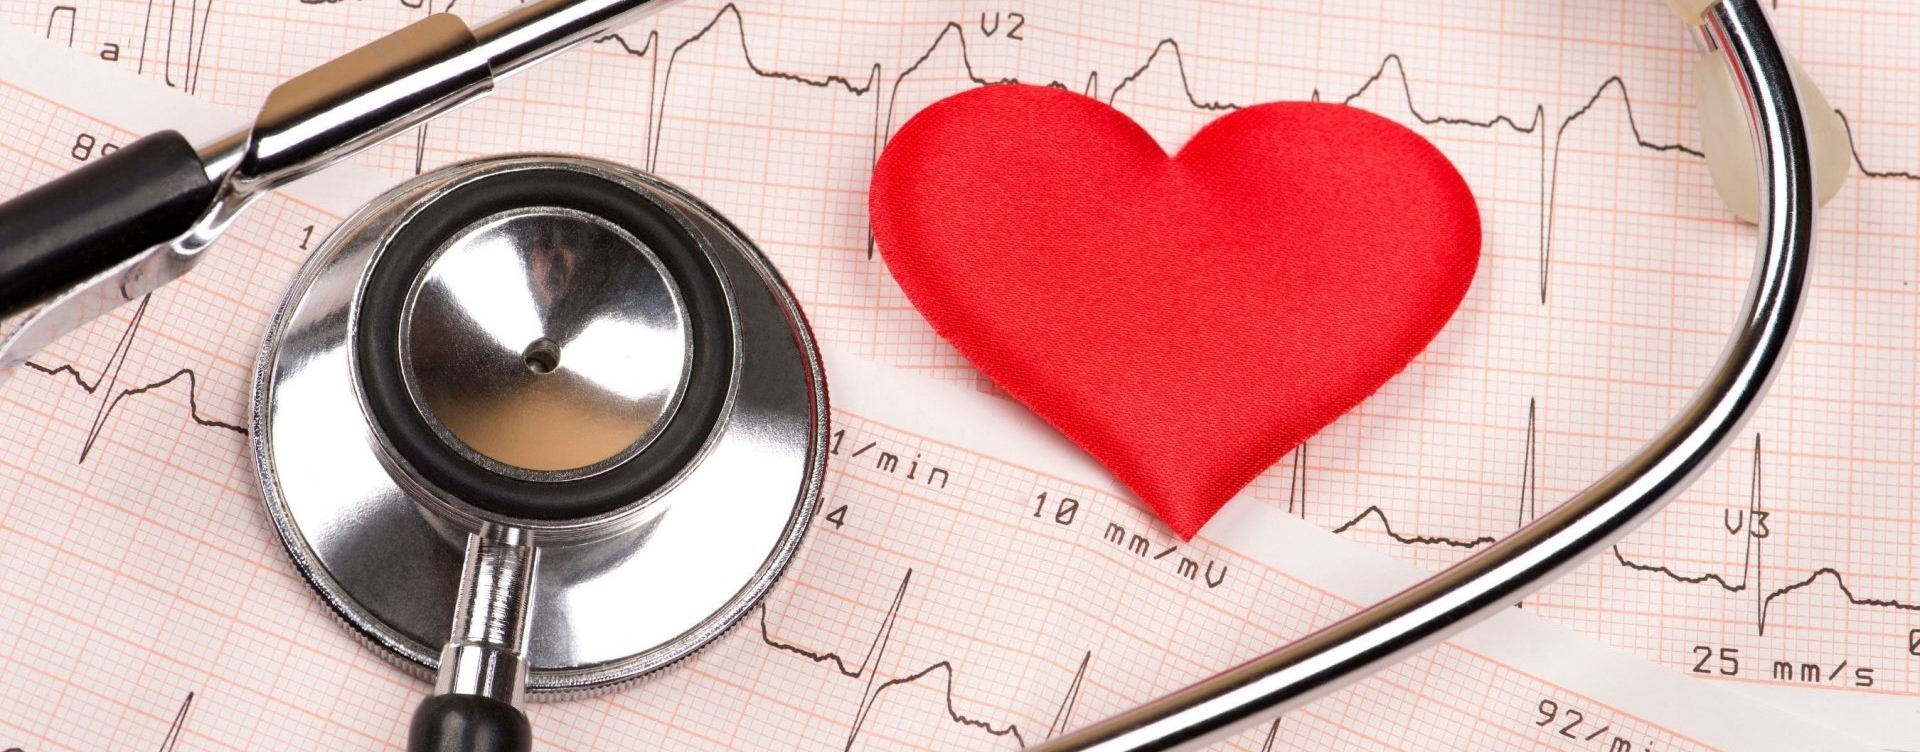

# IMPORTING LIBRARIES

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt    #Importing pyplot interface using matplotlib

import seaborn as sns      #Importin seaborn library for interactive visualization

from sklearn.preprocessing import LabelEncoder     #Importing LabelEncoder to change the data type

from sklearn.preprocessing import StandardScaler    #Importing StandardScaler using sklearn library

from sklearn.model_selection import train_test_split     #To split the data into training and testing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score     #To generate classification report and acuracy score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Dataset.
df = pd.read_csv("/content/drive/MyDrive/Internship/Heart Failure Prediction Dataset/heart.csv")

In [ ]:
# Printing the number of rows and columns of a dataset as well as Dataset.
print('Shape of our Dataset -',df.shape)
df

Shape of our Dataset - (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# Returns a list of column names in the dataset.
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Gives a summary of the dataset including column names, data types, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Gives descriptive statistics of a dataset.
df.describe().round(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,132.397,198.800,0.233,136.809,0.887,0.553
std,9.433,18.514,109.384,0.423,25.460,1.067,0.497
min,28.000,0.000,0.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,173.250,0.000,120.000,0.000,0.000
50%,54.000,130.000,223.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


In [ ]:
# Returns the data type of each feature of a dataset.
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
# Value counts of the feature HeartDisease
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Observations
###### ⪼  We have 918 Rows of observations having 12 columns.
###### ⪼ 'HeartDisease' is our Output feature indicating whether the Patient  has a "Heart Disease" (1) or is "Normal" (0).
###### ⪼  The feature "HeartDisease" is not evenly distributed
###### ⪼  dtype(data type) of features "Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope" are Object which have to be altered

-----------------------------

# DATA PREPROCESSING

In [ ]:
# Checking null values in the dataset
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# Checking duplicate values in the dataset
df.duplicated().any()

False

### Observations
##### ⪼ No missing values.
##### ⪼ No duplicates.

_______________________________________________________________________________________________

# EDA (Exploratory Data Analysis)

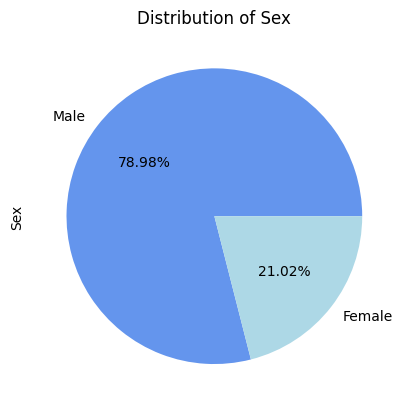

In [ ]:
# Distribution of feature "Sex"
labels = ['Male', 'Female']
df['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=['cornflowerblue', 'lightblue'],labels=labels)
plt.title('Distribution of Sex')
plt.show()

As we can see from above figure, Male Percentage (79%) is very high than Female percentage (21%). This indicates that the predominant representation of males in this dataset

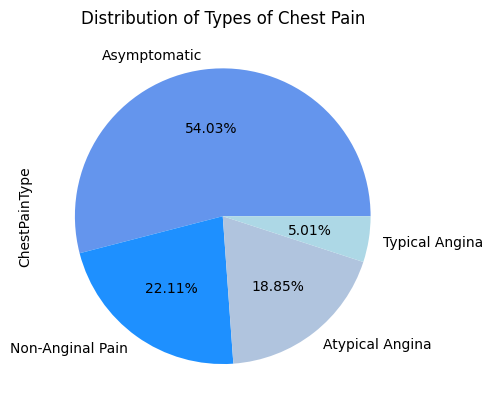

In [ ]:
# Distribution of feature "ChestPainType"
labels = ['Asymptomatic', 'Non-Anginal Pain','Atypical Angina','Typical Angina']
df['ChestPainType'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['cornflowerblue', 'dodgerblue','lightsteelblue','lightblue'],labels=labels)
plt.title('Distribution of Types of Chest Pain')
plt.show()

This figure depicts Asymptonic Chest Pain (ASY) is most common followed by Non Anginal (22%),Atypical (19%) and Typical (5%) Chest Pain

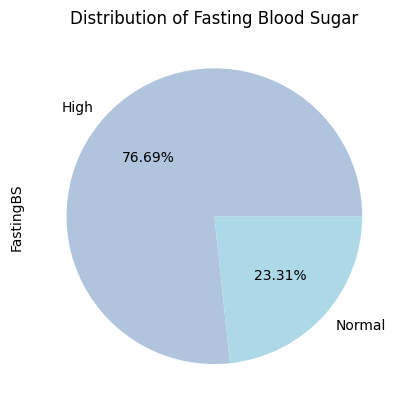

In [ ]:
# Distribution of feature "FastingBS"
labels = ['High', 'Normal']
df['FastingBS'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['lightsteelblue', 'lightblue'],labels=labels)
plt.title('Distribution of Fasting Blood Sugar')
plt.show()

We can see that almost 77% of the people don't have diabetes. That means prevalence of diabetes cases is low.

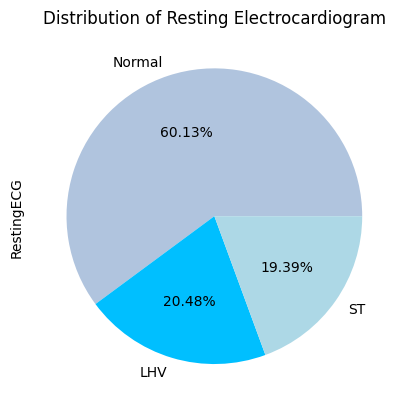

In [ ]:
# Distribution of feature "RestingECG"
labels =  ['Normal', 'LHV','ST']
df['RestingECG'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['lightsteelblue','deepskyblue', 'lightblue'],labels = labels)
plt.title('Distribution of Resting Electrocardiogram')
plt.show()

Almost 60% people have normal ECG

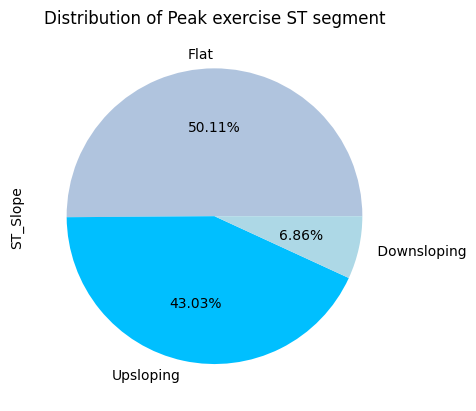

In [ ]:
# Distribution of feature "ST_Slope"
labels =  ['Flat', 'Upsloping',' Downsloping']
df['ST_Slope'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['lightsteelblue','deepskyblue', 'lightblue'],labels = labels)
plt.title('Distribution of Peak exercise ST segment')
plt.show()

This pie chart illustrates that the proportional representation of each ST_Slope category, Flat being the most common followed by Up and Down

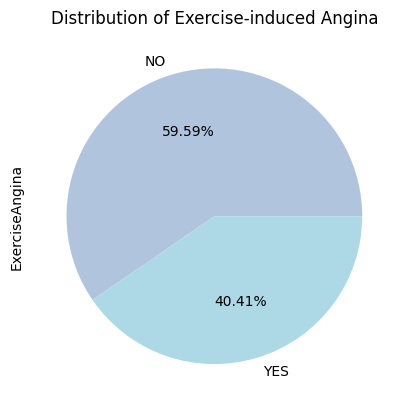

In [ ]:
# Distribution of feature "ExerciseAngina"
labels =  ['NO', 'YES']
df['ExerciseAngina'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['lightsteelblue', 'lightblue'],labels=labels)
plt.title('Distribution of Exercise-induced Angina')
plt.show()

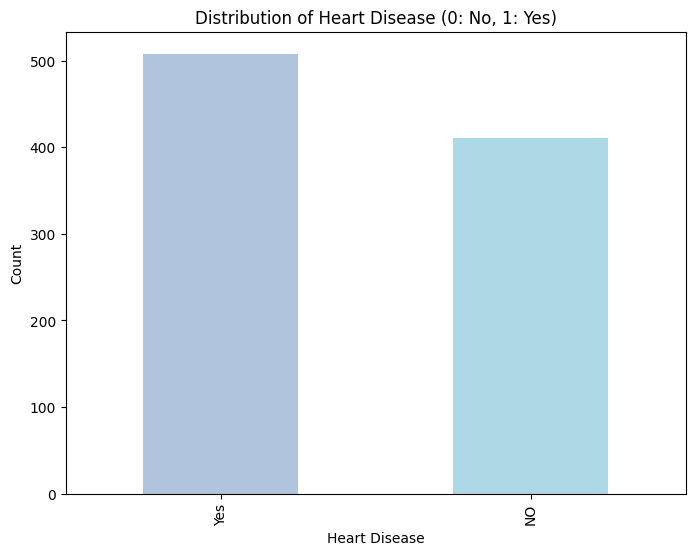

In [ ]:
# Observing the Disribution of the Feature 'HeartDiseaseass'
plt.figure(figsize=(8, 6))
df['HeartDisease'].value_counts().plot(kind='bar', color=['lightsteelblue', 'lightblue'])
plt.title('Distribution of Heart Disease (0: No, 1: Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([1, 0], ['NO', 'Yes'])
plt.show()

## Checking For Ourliers

### Age

<Axes: >

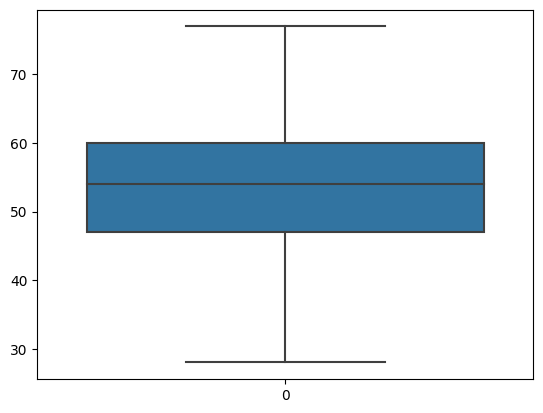

In [ ]:
# Observing for any Outliers for feature "Age"
sns.boxplot(df['Age'])

From the boxplot it is clear that there are no outliers


# RestingBP

<Axes: >

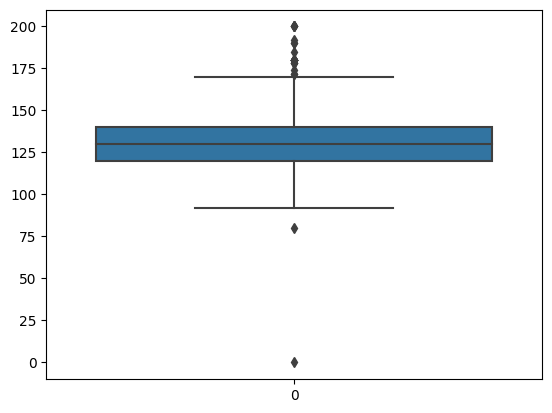

In [ ]:
# Observing for any Outliers for feature "RestingBP"
sns.boxplot(df['RestingBP'])

 From the boxplot it is clear that many outliers

In [ ]:
# Observing Outliers in a table format of feature "RestingBP"
q3=np.percentile(df['RestingBP'],75)
q1=np.percentile(df['RestingBP'],25)
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr
outliers=df[~((df['RestingBP']>90) & (df['RestingBP']<170))]
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
86,65,M,ASY,170,263,1,Normal,112,Y,2.0,Flat,1
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0


In [ ]:
outliers.shape

(42, 12)

 1. One row in restingBP has zero value so we should remove it.
 2. There are some BP rows in which colesterol values are zero so we should remove that row

In [ ]:
# Dropping rowa where the values are 0
df.drop(outliers.loc[outliers['Cholesterol']==0].index,inplace=True)

In [ ]:
df[~((df['RestingBP']>minimum) & (df['RestingBP']<maximum))]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
86,65,M,ASY,170,263,1,Normal,112,Y,2.0,Flat,1
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0


We removed 10 rows from 'RestingBP' column which was outlie

# 3. Cholesterol

In [ ]:
# Observing thw feature "Cholesterol" where the values are 0
df[df['Cholesterol']==0].shape[0]/df.shape[0]

0.17841409691629956

Nearly 18% values in 'Cholesterol' column is filled with zeroes

<Axes: >

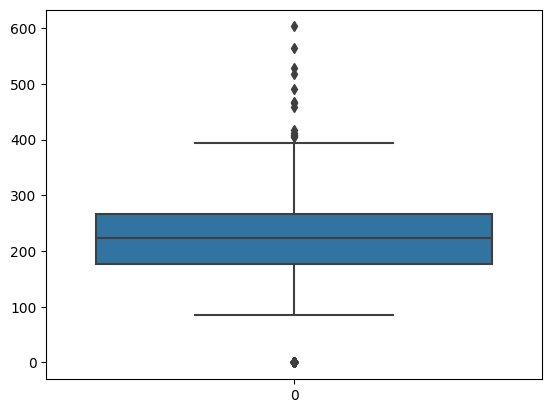

In [ ]:
# Observing for any Outliers for feature "Cholesterol"
sns.boxplot(df['Cholesterol'])

In this column we can clearly see zeros value and some outliers

# 4. MaxHR

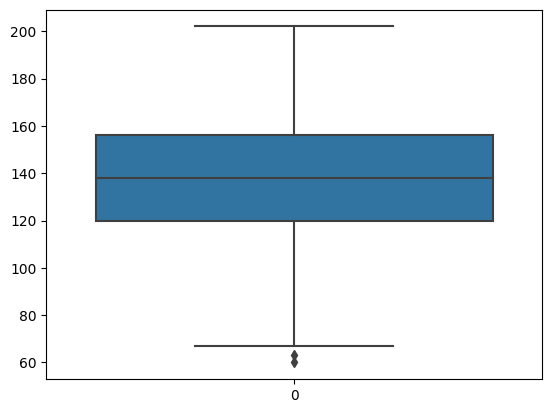

In [ ]:
# Observing for any Outliers for feature "MaxHR"
sns.boxplot(df['MaxHR']);

From the boxplot it is clear that some outliers

In [ ]:
# Observing Outliers in a table format of feature "MaxHR"
q3=np.percentile(df['MaxHR'],75)
q1=np.percentile(df['MaxHR'],25)
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr
df[~((df['MaxHR']>minimum) & (df['MaxHR']<maximum))]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


There are two ouliers in this data we can remove it



In [ ]:
# Dropping row '370'and '390' from the dataframe
df.drop([370,390],inplace=True)

# 4. OldPeak

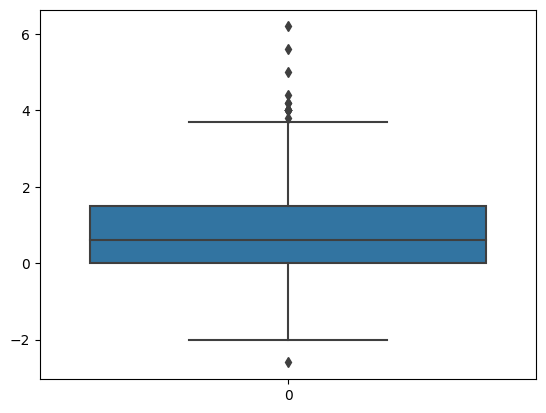

In [ ]:
# Observing for any Outliers for feature "Oldpeak"
sns.boxplot(df['Oldpeak']);

 From the boxplot it is clear that many outliers

In [ ]:
# Observing Outliers in a table format of feature "Oldpeak"
q3=np.percentile(df['Oldpeak'],75)
q1=np.percentile(df['Oldpeak'],25)
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr
df[~((df['Oldpeak']>minimum) & (df['Oldpeak']<maximum))]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1


We can remove row 324 because cholesterol is zero and oldpeak is an outlier value:

In [ ]:
# Dropping row '324' from the dataframe
df.drop([324],inplace=True)

###### Performing Label Encoding

In [ ]:
# Create a LabelEncoder instance
le = LabelEncoder()

In [ ]:
# Fiting the encoder to the data and transforming the categories to integer
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['Sex'] = le.fit_transform(df['Sex'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

# SPLIT DATA INTO TEST AND TRAIN

In [ ]:
# Split the data into features (X) and target (y).
x=df.drop(columns='HeartDisease')
y=df['HeartDisease']

In [ ]:
# Standardize the feature data (x)
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)

[[-1.4218467   0.5189265   0.22648232 ... -0.81837748 -0.83884333
   1.04413007]
 [-0.47126463 -1.92705518  1.27222975 ... -0.81837748  0.10221681
  -0.60210288]
 [-1.73870739  0.5189265   0.22648232 ... -0.81837748 -0.83884333
   1.04413007]
 ...
 [ 0.37369721  0.5189265  -0.81926511 ...  1.22193001  0.29042883
  -0.60210288]
 [ 0.37369721 -1.92705518  0.22648232 ... -0.81837748 -0.83884333
  -0.60210288]
 [-1.63308716  0.5189265   1.27222975 ... -0.81837748 -0.83884333
   1.04413007]]


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Model Training

### i) RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Randon Forest Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf)*100,"%")

Randon Forest Classifier
Confusion Matrix:
 [[70 12]
 [ 9 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.88      0.91      0.90        99

    accuracy                           0.88       181
   macro avg       0.88      0.88      0.88       181
weighted avg       0.88      0.88      0.88       181


Accuracy Score: 88.39779005524862 %


In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred_rf)*100
print("Precision:", precision,"%")

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred_rf)*100
print("Recall (Sensitivity):", recall,"%")

# Calculate F1-score
f1 = f1_score(y_test, y_pred_rf)*100
print("F1-Score:", f1,"%")

Precision: 88.23529411764706 %
Recall (Sensitivity): 90.9090909090909 %
F1-Score: 89.55223880597015 %


### ii) Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = clf.predict(X_test)

In [ ]:
print("Support Vector Machine")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm)*100,"%")

Support Vector Machine
Confusion Matrix:
 [[73  9]
 [ 7 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92        99

    accuracy                           0.91       181
   macro avg       0.91      0.91      0.91       181
weighted avg       0.91      0.91      0.91       181


Accuracy Score: 91.16022099447514 %


In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred_svm)*100
print("Precision:", precision,"%")

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred_svm)*100
print("Recall (Sensitivity):", recall,"%")

# Calculate F1-score
f1 = f1_score(y_test, y_pred_svm)*100
print("F1-Score:", f1,"%")

Precision: 91.0891089108911 %
Recall (Sensitivity): 92.92929292929293 %
F1-Score: 92.0 %


### iii) Gradient Boosting Classifier (XGBoost)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb)*100,'%')

XGBoost Model
Confusion Matrix:
 [[71 11]
 [10 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.89        99

    accuracy                           0.88       181
   macro avg       0.88      0.88      0.88       181
weighted avg       0.88      0.88      0.88       181


Accuracy Score: 88.39779005524862 %


In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred_xgb)*100
print("Precision:", precision,"%")

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred_xgb)*100
print("Recall (Sensitivity):", recall,"%")

# Calculate F1-score
f1 = f1_score(y_test, y_pred_xgb)*100
print("F1-Score:", f1,"%")

Precision: 89.0 %
Recall (Sensitivity): 89.8989898989899 %
F1-Score: 89.44723618090453 %


### iv) K-NN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn =  knn.predict(X_test)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn)*100,'%')

XGBoost Model
Confusion Matrix:
 [[76  6]
 [12 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        82
           1       0.94      0.88      0.91        99

    accuracy                           0.90       181
   macro avg       0.90      0.90      0.90       181
weighted avg       0.90      0.90      0.90       181


Accuracy Score: 90.05524861878453 %


In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred_knn)*100
print("Precision:", precision,"%")

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred_knn)*100
print("Recall (Sensitivity):", recall,"%")

# Calculate F1-score
f1 = f1_score(y_test, y_pred_knn)*100
print("F1-Score:", f1,"%")

Precision: 93.54838709677419 %
Recall (Sensitivity): 87.87878787878788 %
F1-Score: 90.625 %


### v) Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb=  nb.predict(X_test)

In [ ]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_nb)*100,'%')

XGBoost Model
Confusion Matrix:
 [[70 12]
 [13 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.88      0.87      0.87        99

    accuracy                           0.86       181
   macro avg       0.86      0.86      0.86       181
weighted avg       0.86      0.86      0.86       181


Accuracy Score: 86.1878453038674 %


In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred_nb)*100
print("Precision:", precision,"%")

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred_nb)*100
print("Recall (Sensitivity):", recall,"%")

# Calculate F1-score
f1 = f1_score(y_test, y_pred_nb)*100
print("F1-Score:", f1,"%")

Precision: 87.75510204081633 %
Recall (Sensitivity): 86.86868686868688 %
F1-Score: 87.30964467005074 %


### Model Evaluation

In [ ]:
RandomForestClassifier = accuracy_score(y_test, y_pred_rf)*100
XGBoost = accuracy_score(y_test, y_pred_xgb)*100
Support_Vector_Machine = accuracy_score(y_test, y_pred_svm)*100
Naive_Byes = accuracy_score(y_test, y_pred_nb)*100
Knn  = accuracy_score(y_test, y_pred_knn)*100

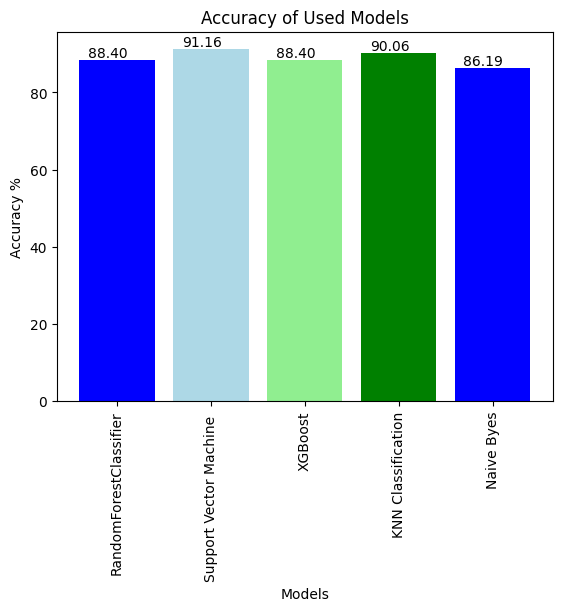

In [ ]:
# Summarizing the Accuracy Scores of the 5 Models

model_names = ['RandomForestClassifier', 'Support Vector Machine ', 'XGBoost','KNN Classification','Naive Byes']
accuracy_values = [RandomForestClassifier, Support_Vector_Machine, XGBoost,Knn,Naive_Byes ]
bars = plt.bar(model_names, accuracy_values, color=['blue', 'lightblue', 'lightgreen', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Accuracy of Used Models')
plt.xticks(rotation=90)

for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.show()